In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('ENB2012_data.xlsx.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.shape

(768, 10)

In [4]:
df=data.rename(columns={"X1": "Relative Compactness", "X2": "Surface Area","X3": "Wall Area","X4": "Roof Area","X5": "Overall Height","X6": "Orientation","X7": "Glazing Area","X8": "Glazing Area Distribution","Y1": "Heating Load","Y2":"Cooling Load"})

In [5]:
df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.isnull().sum().any()

False

In [9]:
df.duplicated().any()

False

**EXPLORATORY DATA ANALYSIS:**

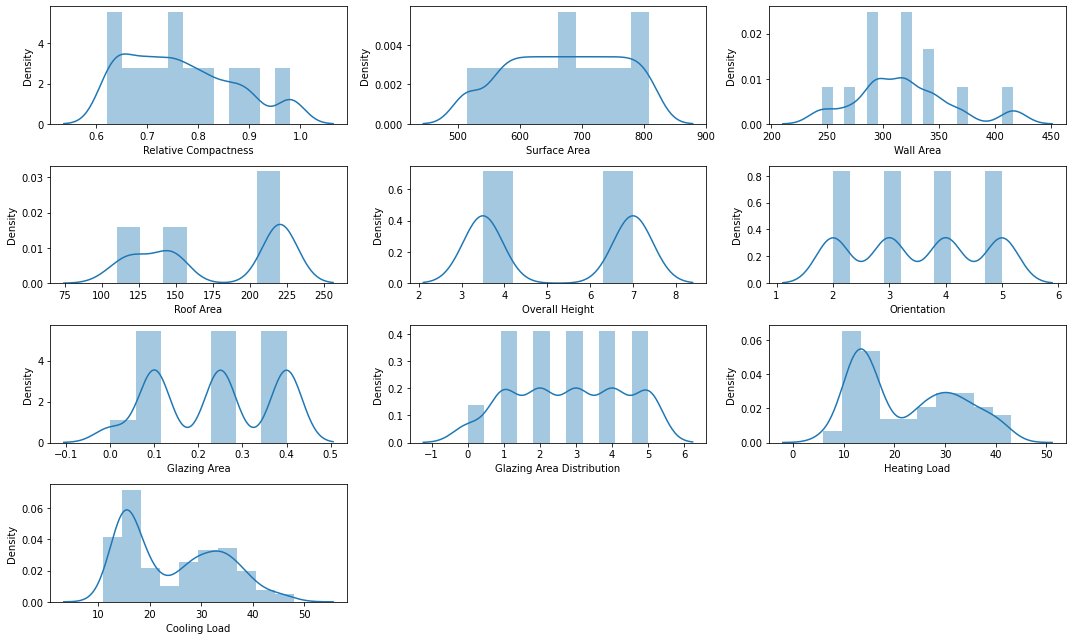

In [10]:
fig = plt.figure(figsize = (15,9))
for a,b in enumerate(df.columns):
    ax = fig.add_subplot(4,3,a+1)
    sns.distplot(df[b])
plt.tight_layout()

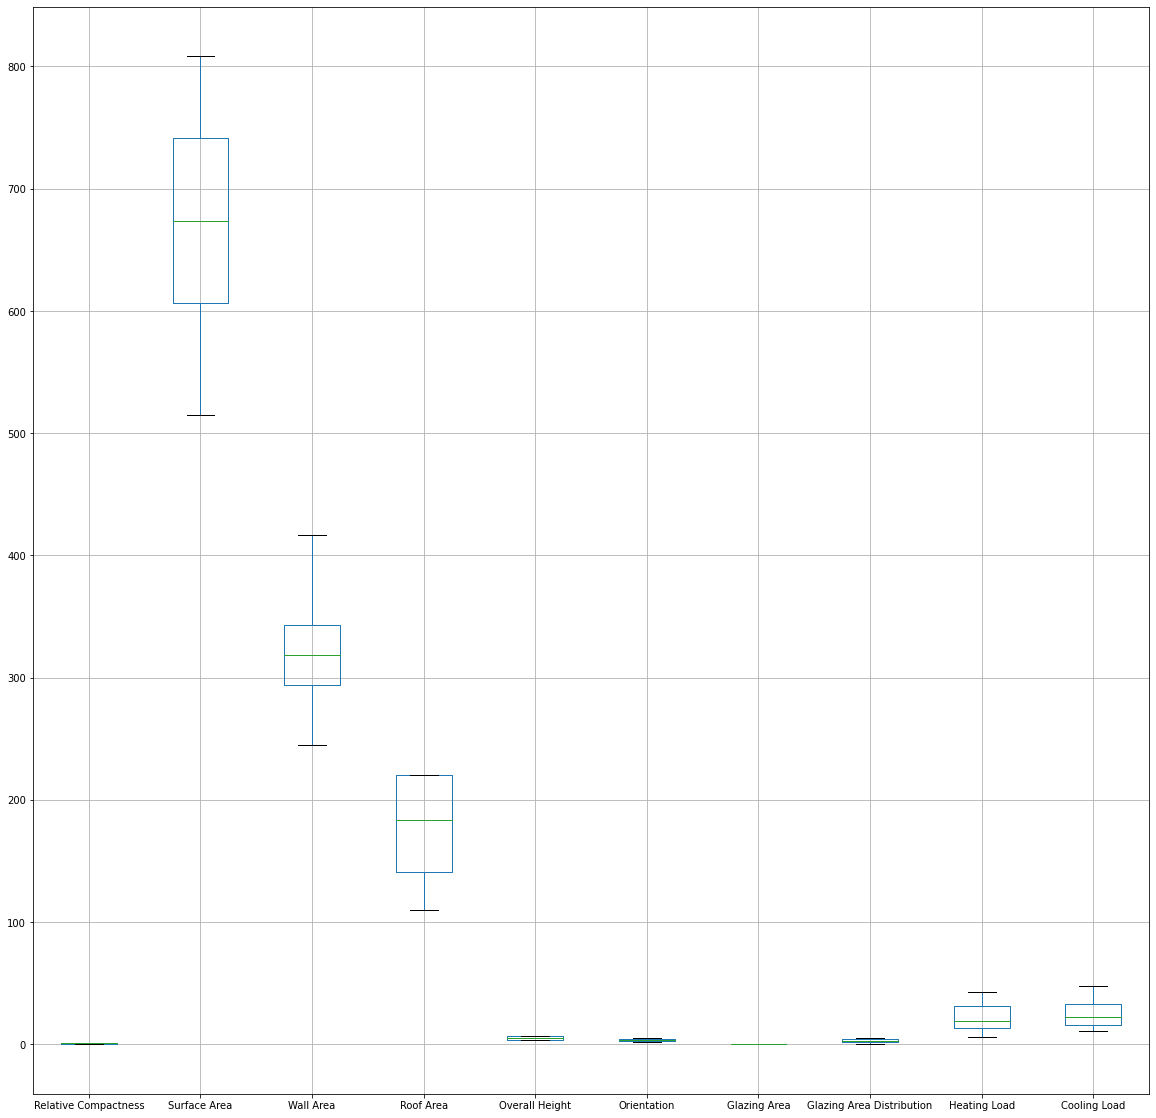

In [11]:
df.boxplot(figsize = (20,20));

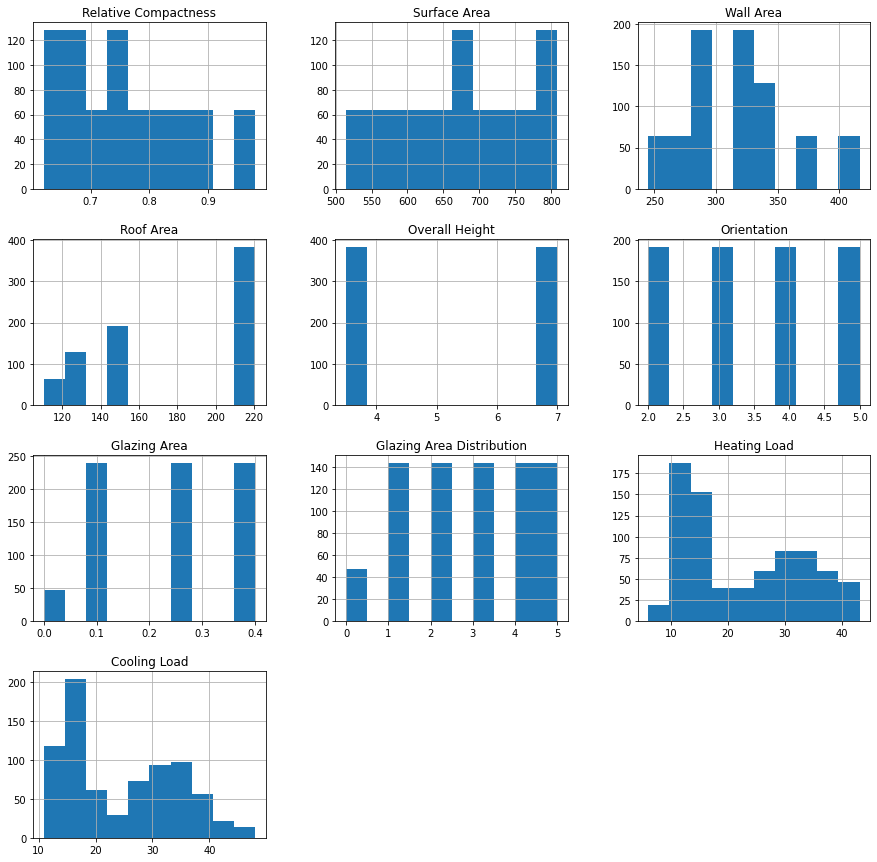

In [12]:
df.hist(figsize = (15,15));

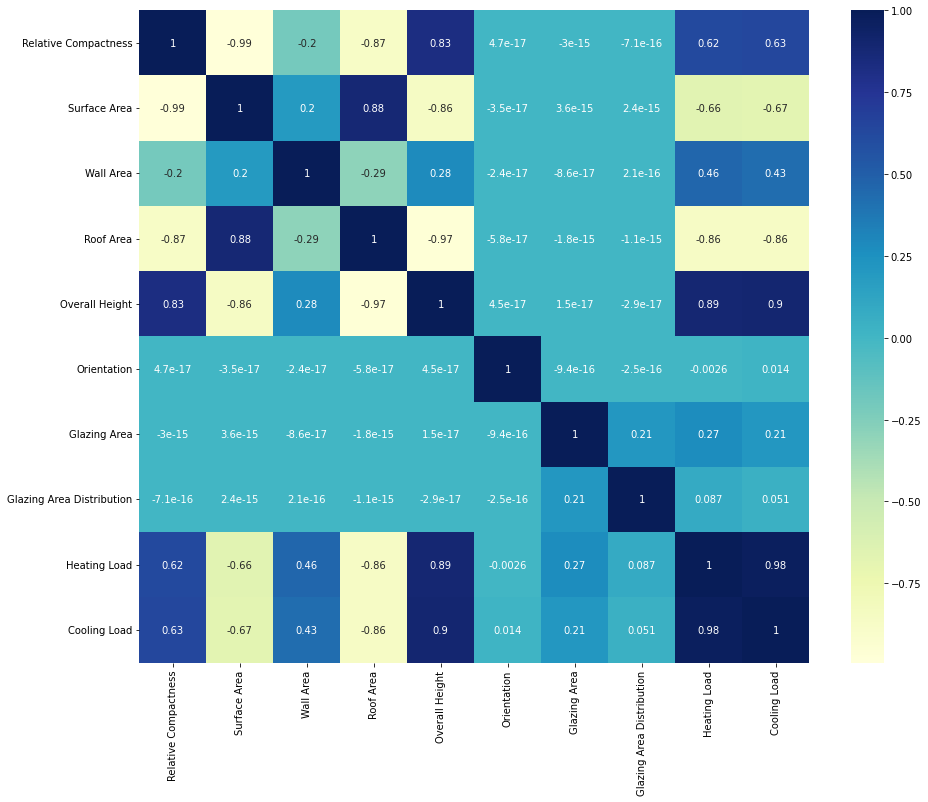

In [13]:
plt.subplots(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")
plt.show()

**MODEL BUILDING:**

In [33]:
X=df.iloc[:,:-2].values
y1=df.iloc[:,-1].values
y2=df.iloc[:,-2].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X,y1,y2, random_state = 0)

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
scores = {}

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y1_train)
print("HEATING LOAD(HL): \nHLtrain: {} \nHLtest: {}".format(lr.score(X_train, y1_train)*100,lr.score(X_test, y1_test)*100))
scores['LinearRegression'] = {'HL Train':lr.score(X_train, y1_train)*100, 'HL Test':lr.score(X_test, y1_test)*100}

lr = LinearRegression().fit(X_train, y2_train)
print("COOLING LOAD(CL): \nCLtrain: {} \nCLtest: {}".format(lr.score(X_train, y2_train)*100,lr.score(X_test, y2_test)*100))
scores['LinearRegression'].update({'CL Train':lr.score(X_train, y1_train)*100,'CL Test':lr.score(X_test, y1_test)*100})

HEATING LOAD(HL): 
HLtrain: 88.64145263153618 
HLtest: 89.0858791731969
COOLING LOAD(CL): 
CLtrain: 91.73515166352442 
CLtest: 91.12896543326833


In [59]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(X_train, y1_train)
print("HEATING LOAD(HL): \nHLtrain: {} \nHLtest: {}".format(forest.score(X_train, y1_train)*100,forest.score(X_test, y1_test)*100))
scores['RandomForestRegressor'] = {'HL Train':forest.score(X_train, y1_train)*100,'HL Test':forest.score(X_test, y1_test)*100}

forest = RandomForestRegressor().fit(X_train, y2_train)
print("COOLING LOAD(CL): \nCLtrain: {} \nCLtest: {}".format(forest.score(X_train, y2_train)*100,forest.score(X_test, y2_test)*100))
scores['RandomForestRegressor'].update({'CL Train':forest.score(X_train, y2_train)*100,'CL Test':forest.score(X_test, y2_test)*100})

HEATING LOAD(HL): 
HLtrain: 99.53367228201574 
HLtest: 96.37995915702476
COOLING LOAD(CL): 
CLtrain: 99.96605050475705 
CLtest: 99.68783012524206


In [60]:
pd.DataFrame(scores).T

,HL Train,HL Test,CL Train,CL Test
LinearRegression,88.641453,89.085879,81.339396,83.150801
RandomForestRegressor,99.533672,96.379959,99.966051,99.687830


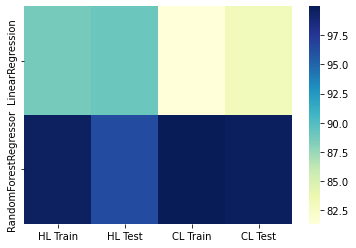

In [62]:
sns.heatmap(pd.DataFrame(scores).T,cmap="YlGnBu")
plt.show()